    Year  Population
16  1955     6529297
15  1960     7695307
14  1965     9338078
13  1970    11368791
12  1975    13511671


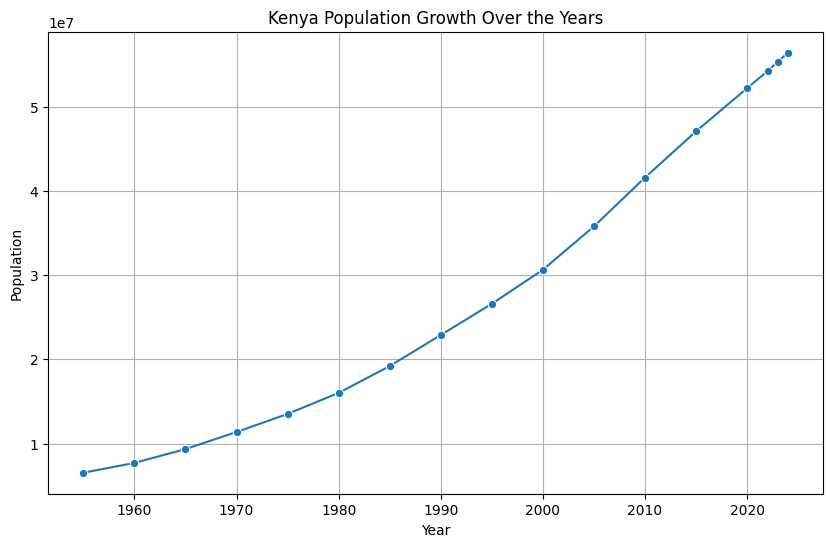

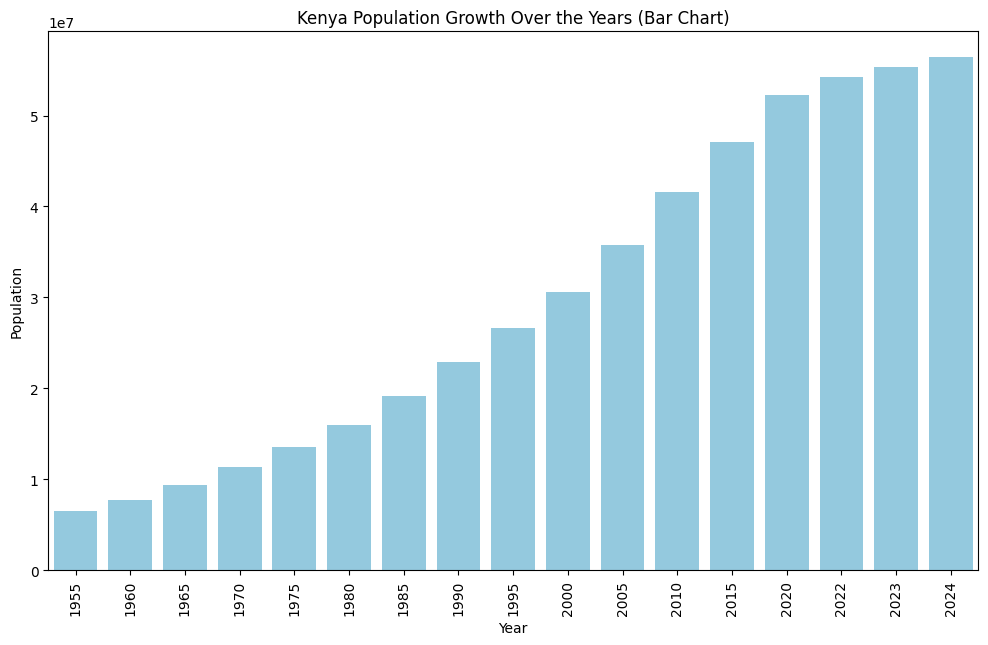

In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape data
def scrape_kenya_population():
    url = "https://www.worldometers.info/world-population/kenya-population/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Finding the table with population data
    table = soup.find("table", {"class": "table table-striped table-bordered table-hover table-condensed table-list"})
    
    # Extracting the data
    years = []
    populations = []
    
    for row in table.find_all("tr")[1:]:  # Skip the header row
        cols = row.find_all("td")
        year = int(cols[0].text.strip())
        population = int(cols[1].text.strip().replace(",", ""))
        
        years.append(year)
        populations.append(population)
    
    # Create DataFrame
    kenya_population_df = pd.DataFrame({"Year": years, "Population": populations})
    kenya_population_df = kenya_population_df.sort_values(by="Year")  # Sort by year
    return kenya_population_df

# Scrape the data
kenya_population_df = scrape_kenya_population()
print(kenya_population_df.head())  # Display first few rows

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=kenya_population_df, x="Year", y="Population", marker="o")
plt.title("Kenya Population Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

# Additional Chart: Bar Chart for Comparison
plt.figure(figsize=(12, 7))
sns.barplot(data=kenya_population_df, x="Year", y="Population", color="skyblue")
plt.title("Kenya Population Growth Over the Years (Bar Chart)")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()
